# Modell zur Bachelorarbeit

In [33]:
#from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from datetime import datetime
#import math
import dill # Transfer data for analysis
# Map in the background of the network plots relies on the mpl_toolkits and the basemap packages to be installed

import pypsa

%matplotlib inline

## Import of the previously created network

In [2]:
with open("network.pickle", 'rb')
    network = dill.load(f)

In [3]:
with open("gen_names.pickle", 'rb') as f:
    gen_names = dill.load(f)

In [12]:
with open("network_demand.pickle", 'rb') as f:
    network_demand = dill.load(f)

## Visualization

## Map topography

Map in the background relies on the mpl_toolkits and the basemap packages to be installed

(<matplotlib.collections.PathCollection at 0x245ef53dc50>,
 <matplotlib.collections.LineCollection at 0x245ef643278>)

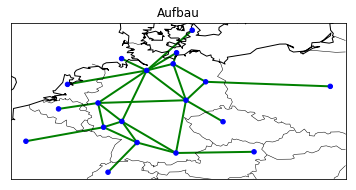

In [4]:
fig,ax=plt.subplots(1,1)

network.plot(bus_sizes=20, title="Aufbau")

In [5]:
gen_outs = network.generators_t.p / 1000
# No negative values for plotting
gen_outs[gen_outs < 0] = 0
power_by_carrier = gen_outs.groupby(network.generators.carrier, axis=1).sum()

In [6]:
graph_colors = {"Erdgas":"orange",
                "Braunkohle":"brown",
                "Steinkohle":"black",
                "Wind":"blue",
                "Import":"green"}

col_order = ["Wind", "Erdgas", "Steinkohle", "Braunkohle", "Import"]

In [7]:
network.objective

5128208120640.0

Text(0,0.5,'MW')

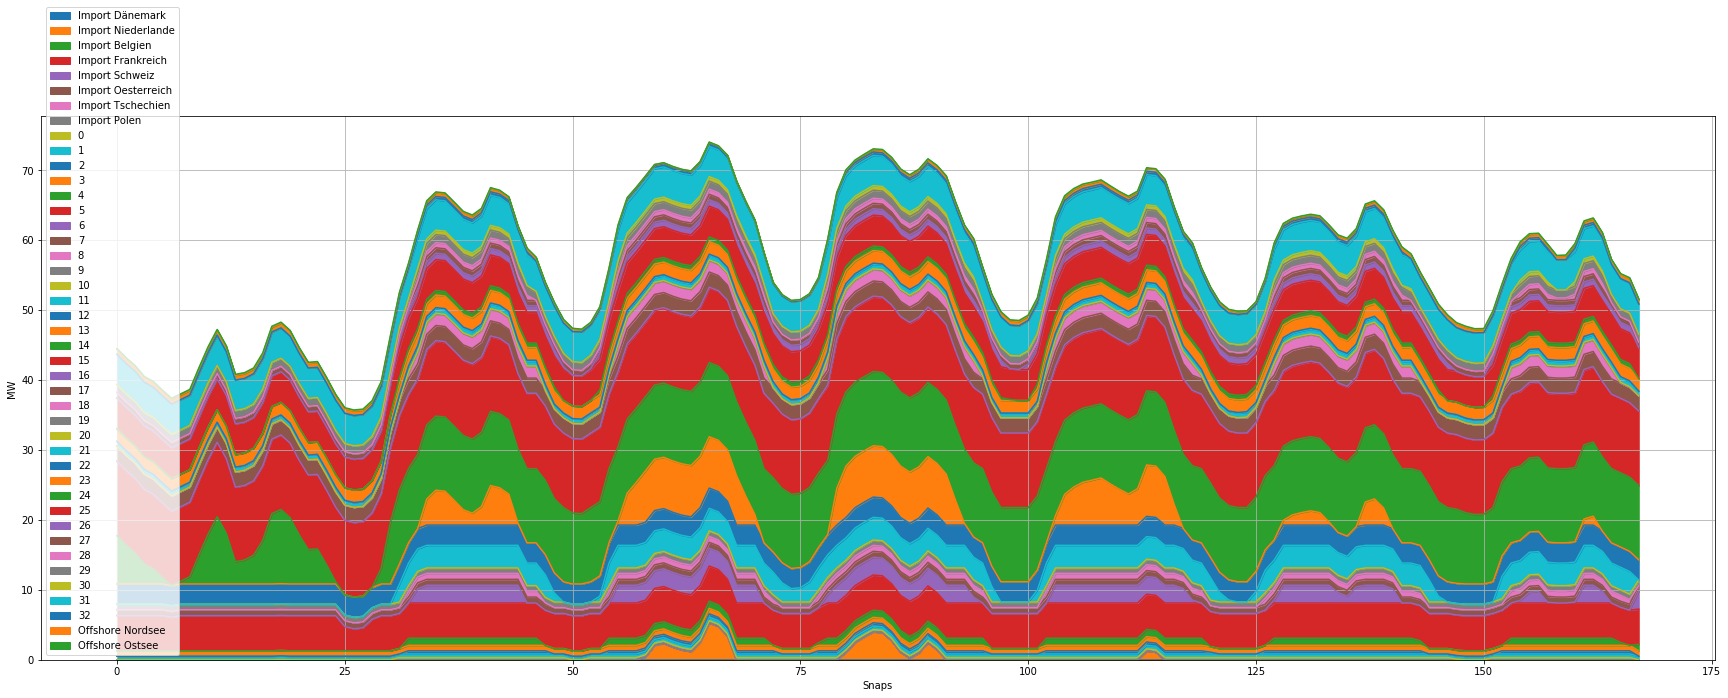

In [8]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,10)

(gen_outs).plot(kind="area",ax=ax, grid=True)

ax.set_xlabel("Snaps")
ax.set_ylabel("MW")

Text(0,0.5,'MW')

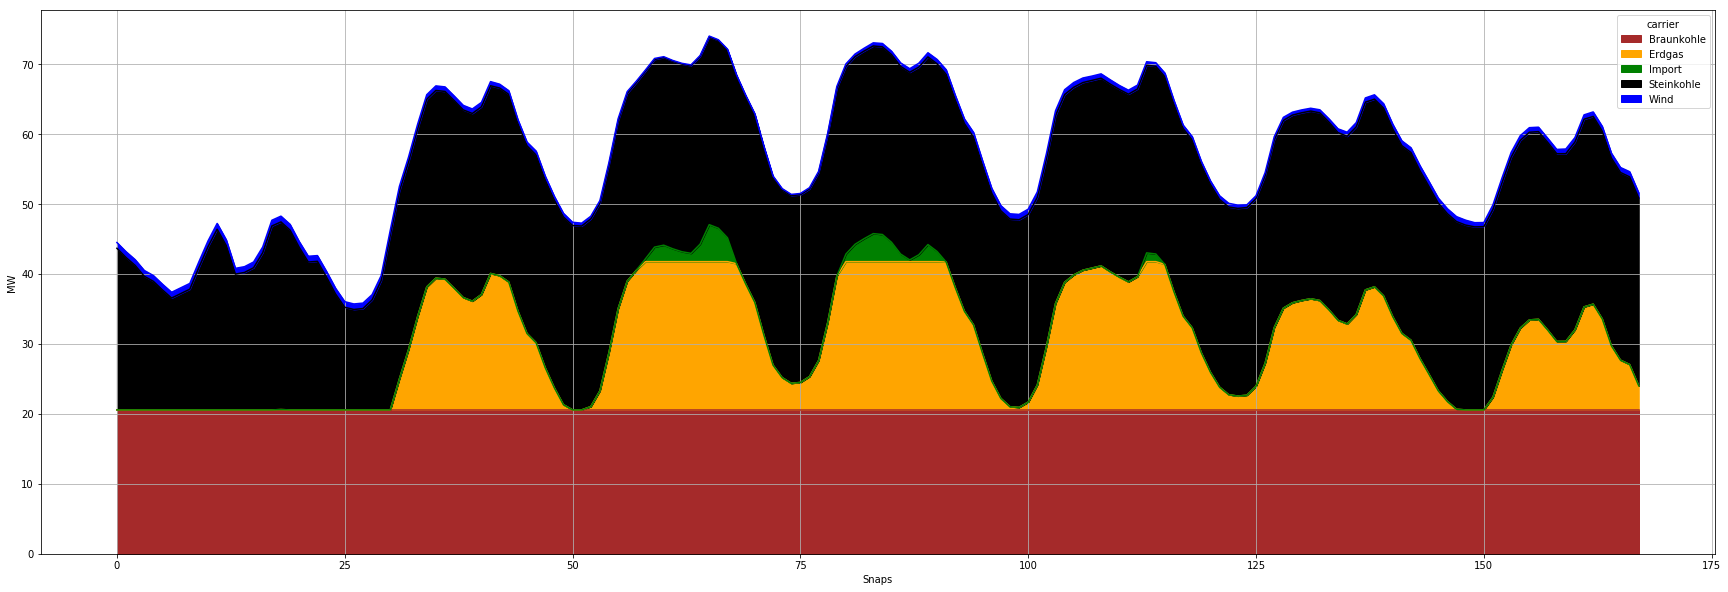

In [9]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(30,10)

power_by_carrier.plot(kind="area",ax=ax, grid=True, color=[graph_colors[i] for i in power_by_carrier.columns])

ax.set_xlabel("Snaps")
ax.set_ylabel("MW")

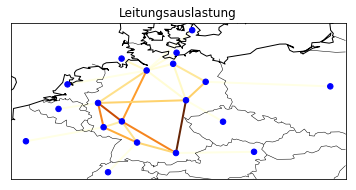

In [10]:
fig,ax=plt.subplots(nrows=1, ncols=1, figsize=(6,6))

perc_load = network.lines_t.p0.loc[45] / network.lines.s_nom

dist = network.plot(bus_sizes=30, line_colors=abs(perc_load), title="Leitungsauslastung", line_cmap="YlOrBr")

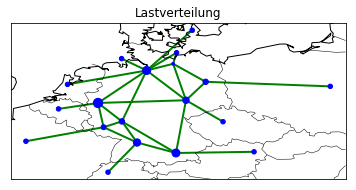

In [38]:
fig, ax = plt.subplots()

rel_bus_size = (network_demand.mean().values.tolist() / network_demand.mean().values.sum())*400

# set buses abroad to basic size
i = len(network.buses) - len(rel_bus_size)
while i <= len(network.buses):
    rel_bus_size = np.append(rel_bus_size, 20)
    i += 1

ax = network.plot(bus_sizes=rel_bus_size, title="Lastverteilung")